# Importação de bibliotecas


Importação de bibliotecas

In [ ]:
pip install pandas

In [ ]:

import warnings
import pandas as pd
import pandas
import numpy as np


In [ ]:
import requests
warnings.filterwarnings('ignore')

# Conectores e leitura de dados

In [ ]:
# URL da API da Alesp
URL_Despesas = 'http://www.al.sp.gov.br/repositorioDados/deputados/despesas_gabinetes.xml'
URL_Cadastro = 'https://www.al.sp.gov.br/repositorioDados/deputados/deputados.xml'

# Pegando os dados
Conexao_01 = requests.get( URL_Despesas )
Conexao_02 = requests.get( URL_Cadastro )

# Verificando se a API funcinou
print( Conexao_01, Conexao_02 )

<Response [200]> <Response [200]>


In [ ]:
#Leitura dos dados da tabela despesas gabinetes
df_01 = pd.read_xml(Conexao_01.content)
df_01.head()

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA


In [ ]:
#Leitura dos dados da tabela deputados
df_02 = pd.read_xml(Conexao_02.content)
df_02.head()


,IdDeputado,IdSPL,IdUA,Situacao,Andar,Aniversario,Biografia,Email,Matricula,NomeParlamentar,PathFoto,Sala,Partido,Telefone,Fax,HomePage,PlacaVeiculo
0,549,1000000330,20377,EXE,3º andar,01/11,"<p style=""margin: 0cm 0cm 0.0001pt; background...",adalbertofreitas@al.sp.gov.br,300605,Adalberto Freitas,http://www3.al.sp.gov.br/repositorio/deputadoP...,305,PSDB,(11) 3886-6557 / 6559,None,None,None
1,548,1000000332,20370,EXE,Térreo,09/07,"<p class=""MsoNormal"">Com uma hist&oacute;ria d...",adrianaborgo@al.sp.gov.br,300606,Adriana Borgo,http://www3.al.sp.gov.br/repositorio/deputadoP...,T. 45,PTC,(11) 3886-6567/8770,None,None,None
2,547,1000000335,20455,EXE,2º andar,26/08,<p>Danilo Mascarenhas de Balas nasceu na cidad...,apfdanilobalas@al.sp.gov.br,300607,Agente Federal Danilo Balas,http://www3.al.sp.gov.br/repositorio/deputadoP...,255,PL,(11)3886-6052/6054,None,None,None
3,128,39,20369,EXE,3º,04/01,"<p style=""outline: none; color: #121212; margi...",ademarchi@al.sp.gov.br,300288,Aldo Demarchi,http://www3.al.sp.gov.br/repositorio/deputadoP...,356,UNIÃO,3886-6453/6454,None,None,None
4,546,1000000342,20399,EXE,1º,17/09,"<p>Alexander Muniz de Oliveira, nascido na cid...",alexdemadureira@al.sp.gov.br,300608,Alex de Madureira,http://www3.al.sp.gov.br/repositorio/deputadoP...,173,PL,(11)3886-6676 / 6677,None,None,None


# Análise de dados

In [ ]:
pd.set_option('display.max_rows', 5000)

In [ ]:
df_01 = df_01.drop_duplicates()

In [ ]:
df_02 = df_02.drop_duplicates()

In [ ]:
df_01.count()

Ano           524632
Matricula     524632
Mes           524632
Valor         524632
CNPJ          513907
Deputado      524632
Tipo          524632
Fornecedor    524632
dtype: int64

In [ ]:
df_02.count()

IdDeputado         93
IdSPL              93
IdUA               93
Situacao           93
Andar              92
Aniversario        93
Biografia          93
Email              93
Matricula          93
NomeParlamentar    93
PathFoto           93
Sala               93
Partido            93
Telefone           93
Fax                20
HomePage            5
PlacaVeiculo        1
dtype: int64

In [ ]:
print(df_01.isnull().sum())

Ano               0
Matricula         0
Mes               0
Valor             0
CNPJ          10725
Deputado          0
Tipo              0
Fornecedor        0
dtype: int64


In [ ]:
print(df_02.isnull().sum())

IdDeputado          0
IdSPL               0
IdUA                0
Situacao            0
Andar               1
Aniversario         0
Biografia           0
Email               0
Matricula           0
NomeParlamentar     0
PathFoto            0
Sala                0
Partido             0
Telefone            0
Fax                73
HomePage           88
PlacaVeiculo       92
dtype: int64


In [ ]:
df_01.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
df_02.dtypes

IdDeputado          int64
IdSPL               int64
IdUA                int64
Situacao           object
Andar              object
Aniversario        object
Biografia          object
Email              object
Matricula           int64
NomeParlamentar    object
PathFoto           object
Sala               object
Partido            object
Telefone           object
Fax                object
HomePage           object
PlacaVeiculo       object
dtype: object

In [ ]:
df_01.Tipo.unique()

array(['A - COMBUSTÍVEIS E LUBRIFICANTES',
       'E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO',
       'N - MORADIA',
       'H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)',
       'J - SERVIÇOS DE COMUNICAÇÃO',
       'D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS',
       'G - ASSINATURAS DE PERIÓDICOS, PUBLICAÇÕES, INTERNET E SOFTWARES',
       'C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE VEÍCULOS ; PEDÁGIOS',
       'K - LOCAÇÃO DE BENS MÓVEIS',
       'M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS',
       'F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)',
       'I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO',
       'O - LOCAÇÃO DE VEÍCULO', 'L - LOCAÇÃO DE BENS IMÓVEIS',
       'B - LOCAÇÃO E MANUT DE BENS MÓVEIS E IMÓVEIS, CONDOMÍNIOS E OUTROS',
       'P - DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR'], dtype=object)

In [ ]:
df_01.Deputado.unique()

array(['ABELARDO CAMARINHA', 'ADALBERTO FREITAS', 'ADILSON BARROSO',
       'ADILSON ROSSI', 'ADRIANA BORGO', 'ADRIANO DIOGO',
       'AFANÁSIO JAZADJI', 'AFONSO LOBATO', 'AGENTE FEDERAL DANILO BALAS',
       'AIRTON GARCIA', 'ALBERTO CALVO', 'ALBERTO TURCO LOCO HIAR',
       'ALCIDES AMAZONAS', 'ALDO DEMARCHI', 'ALENCAR SANTANA BRAGA',
       'ALESSANDRA MONTEIRO', 'ALEX DE MADUREIRA', 'ALEX MANENTE',
       'ALEXANDRE DA FARMÁCIA', 'ALEXANDRE PEREIRA', 'ALFREDO RUZZA',
       'ALOÍSIO VIEIRA', 'ALTAIR MORAES', 'ANA DO CARMO', 'ANA MARTINS',
       'ANA PERUGINI', 'ANALICE FERNANDES', 'ANDRÉ DO PRADO',
       'ANDRÉ SOARES', 'ANGELO PERUGINI', 'ANTONIO CARLOS JUNIOR',
       'ANTONIO MENTOR', 'ANTONIO SALIM CURIATI',
       'ANTÔNIO AGUIMARÃES DE CALDAS', 'ANTÔNIO CARLOS', 'APRIGIO',
       'ARNALDO JARDIM', 'ARTHUR ALVES PINTO', 'ARY FOSSEN',
       'ATAIDE TERUEL', 'ATILA JACOMUSSI', 'BALEIA ROSSI',
       'BARROS MUNHOZ', 'BETH SAHÃO', 'BETO TRÍCOLI', 'BRUNO COVAS',
       'BRUNO F

In [ ]:
sorted(pd.unique(df_01['Fornecedor']))

['" A COMADRE LANCHONETE E RESTAURANTE" PEDRO VILLELA  VILHENA - ME.',
 '" VÓ MAPHALDA "  SALADA GRILL',
 '"A TRIBUNA" DE SANTOS JORNAL E EDITORA LTDA',
 '"A VARANDA" - JOSÉ ROBERTO GERALDO - ME',
 '"ESTÂNCIA SERVIÇOS ALIMENTARES" - IVONE MEIRA DA SILVA - ME',
 '"MEGA PARK " ESTACIONAMENTO',
 '"O BRASEIRO" GALETO NA BRASA LTDA',
 '"O BRAZEIRO" GALETO NA BRASA LTDA',
 '"O REI DOS ENVELOPES" GRAF. COMERCIAL E DISTRIBUIDORA LTDA.',
 '"POSTO SÃO SEBASTIÃO" - AUTO POSTO CESTO GARCIA LTDA',
 "'FATOR GRAFICO GRAFICA E EDITORA LTDA -ME",
 "'FREIRE VEÍCULOS",
 '(POSTO MENEGUETTI) AUTO POSTO JOTAVE LTDA',
 ',ARIA HELENA GOMES RESTAURANTE ME',
 ',ARIA JULIA BARNABE BARBOZA - ME',
 ',AUTO POSTO CENTER LESTE LTDA',
 ',AUTO POSTO ITAPURA',
 ',FENIX AUTO POSTO DE SERVIÇOS LTDA',
 ',ODELO PAPELARIA E LIVRARIA LTDA',
 ',POSTO DE SERVIÇOS MARIANA LTDA',
 ",POSTO DE SERVIÇOS PAP'S ENSEADA LTDA",
 ',RONER PIRES NUNES - ME',
 '-AUTO POSTO MOEMA DA FRONTEIRA LTDA',
 '.K.F. COMÉRCIO DE ALIMENTOS LTDA',
 ".MC

# Formatando tabela

In [ ]:
df_02.drop(['Email','Andar','Aniversario','Biografia','PathFoto'], axis=1, inplace=True)

In [ ]:
df_02.drop(['Telefone','Fax','HomePage','PlacaVeiculo'], axis=1, inplace=True)

In [ ]:
df_01['CNPJ'].fillna('Não informado', inplace = True)

In [ ]:
df_01['Fornecedor'].replace(to_replace =["TAXI","TÁXI","taxi"],
                 value ="Táxi",inplace=True)

In [ ]:
df_01['Fornecedor'].replace(to_replace =["Claro","Claro SA","Claro S.A","CLARO  S/A"],
                 value ="Claro S.A.",inplace=True)

In [ ]:
df_01['Fornecedor'].replace(to_replace =["telefonica","telefônica","Telefonica","Telefônica","telefonica Brasil",
"Telefônica Brasil","TELEFONICA BRASIL","TELEFÔNICA BRASIL","TELEFONICA BRASIL S.A","TELEFONICA BRASIL S.A.","Telefônica Brasil S.A."],
                 value ="TELEFONICA BRASIL S.A.",inplace=True)

In [ ]:
df_01['Fornecedor'].replace(to_replace =["PEDAGIO", "PEDÁGIO","PEDÁGIOS"], value ="Pedágio",inplace=True)

# Insights

In [ ]:
#Separar em novo dataframe para facilitar os insights
df_ano = df_01.loc[df_01['Ano'] >= 2018]

In [ ]:
#Gastos dos desputados no período, do maior para o menor
df_ano.groupby('Deputado')['Valor'].sum().sort_values(ascending=False)

Deputado
TEONILIO BARBA                       1518809.07
MARTA COSTA                          1492396.28
CARLÃO PIGNATARI                     1475097.38
MÁRCIA LIA                           1464757.54
ENIO TATTO                           1463656.31
CAMPOS MACHADO                       1431464.73
JORGE WILSON XERIFE DO CONSUMIDOR    1416746.31
SEBASTIÃO SANTOS                     1373750.27
FERNANDO CURY                        1348236.77
MARIA LÚCIA AMARY                    1336380.57
JOSÉ AMÉRICO                         1332728.36
LUIZ FERNANDO T. FERREIRA            1312713.89
RODRIGO MORAES                       1291468.17
WELLINGTON MOURA                     1277950.34
ITAMAR BORGES                        1268250.46
CAIO FRANÇA                          1175428.46
LECI BRANDÃO                         1172278.90
VINÍCIUS CAMARINHA                   1164305.11
BARROS MUNHOZ                        1145700.85
PAULO FIORILO                        1092811.33
ROBERTO MORAIS                 

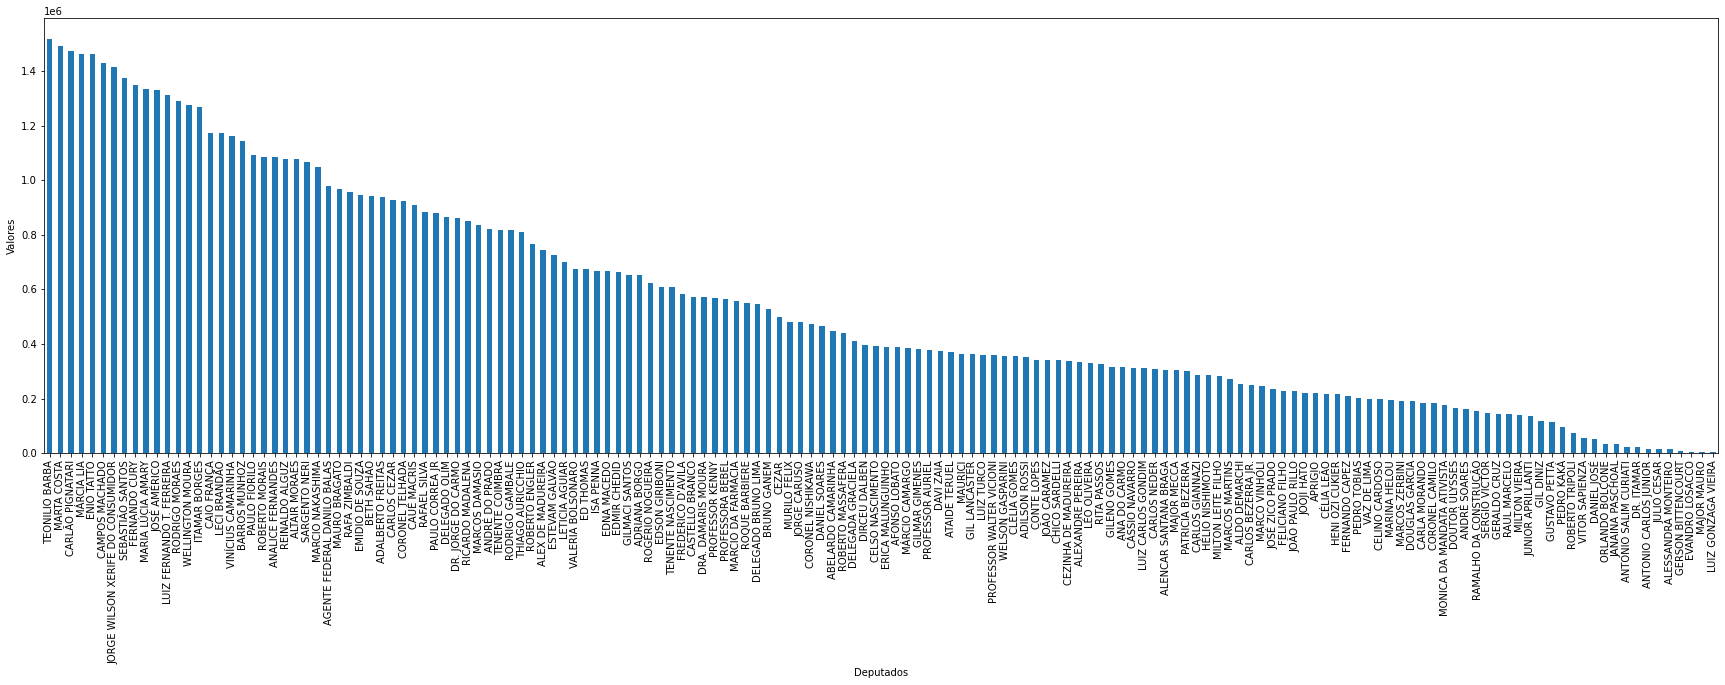

In [ ]:
#Gastos dos desputados no período, do maior para o menor com plot
df_ano.groupby('Deputado')['Valor'].sum().sort_values(ascending=False).plot.bar(x='Deputado',y='Valor',figsize=(30,8),xlabel="Deputados",ylabel="Valores")

In [ ]:
#Gastos totais dos anos
df_ano.groupby('Ano')['Valor'].sum()

Ano
2018    21805727.79
2019    19437855.90
2020    16949849.75
2021    21726688.72
2022     6207213.26
Name: Valor, dtype: float64

In [ ]:
#Meses com mais gastos no total
df_ano.groupby('Mes')['Valor'].sum().sort_values(ascending=False)

Mes
2     8896100.40
3     8554020.65
1     8250604.13
11    6969475.45
12    6869029.39
6     6771897.89
10    6752139.38
5     6676479.14
7     6663452.46
8     6662733.98
4     6616183.97
9     6445218.58
Name: Valor, dtype: float64

In [ ]:
#Média mensal de gastos 
df_ano.groupby('Mes')['Valor'].median().sort_values(ascending=False)

Mes
12    310.690
1     290.000
4     267.280
11    264.890
10    260.000
2     258.255
3     250.000
9     246.490
7     240.470
5     240.000
6     240.000
8     237.980
Name: Valor, dtype: float64

In [ ]:
#Média anual de gastos
df_ano.groupby('Ano').Valor.median().sort_values(ascending=False)

Ano
2020    326.150
2022    299.980
2021    288.835
2019    221.065
2018    220.000
Name: Valor, dtype: float64

In [ ]:
#Média mensal de gastos organizada por ano
df_ano.groupby(['Ano','Mes']).Valor.median()

Ano   Mes
2018  1       241.780
      2       221.380
      3       215.000
      4       232.990
      5       212.530
      6       214.630
      7       196.565
      8       198.960
      9       200.000
      10      253.000
      11      245.505
      12      271.890
2019  1       250.000
      2       236.260
      3       197.250
      4       200.000
      5       199.990
      6       208.080
      7       229.820
      8       220.750
      9       225.000
      10      239.850
      11      229.635
      12      255.510
2020  1       309.640
      2       267.900
      3       272.980
      4       461.795
      5       422.810
      6       371.080
      7       333.790
      8       312.350
      9       297.850
      10      274.680
      11      326.855
      12      360.000
2021  1       360.000
      2       299.600
      3       331.280
      4       309.080
      5       271.300
      6       250.000
      7       264.600
      8       252.350
      9       259.625


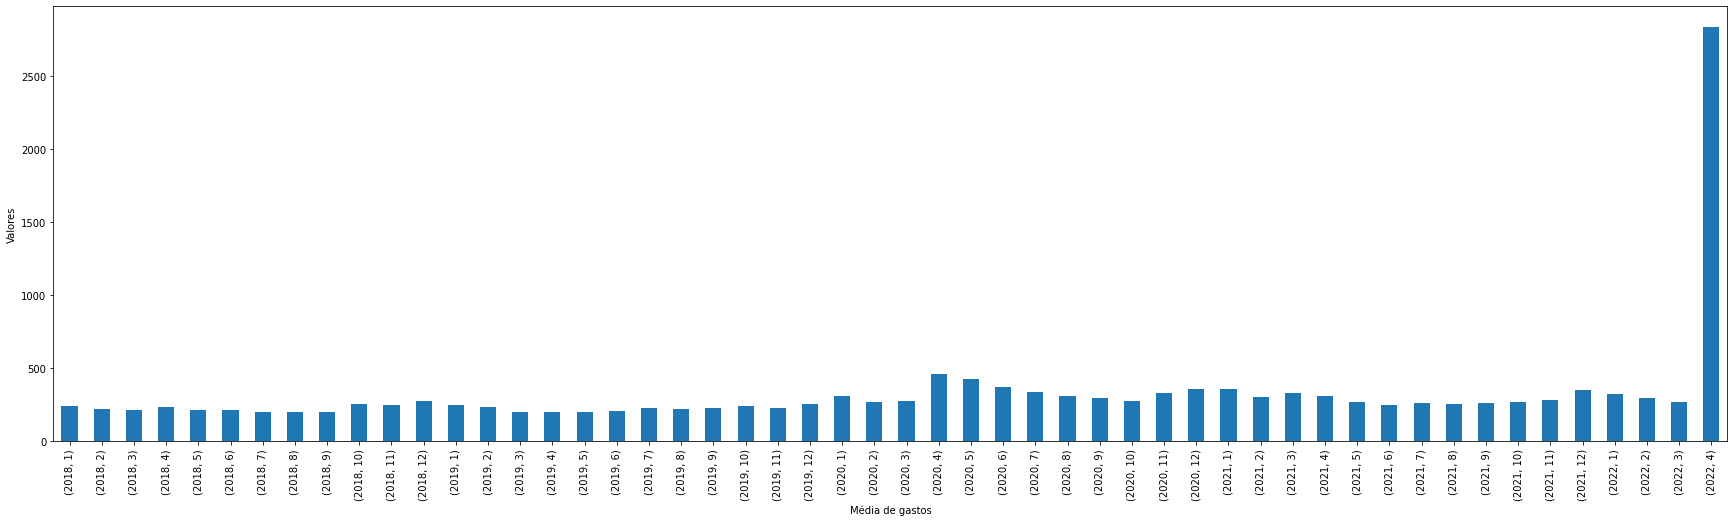

In [ ]:
#Média mensal de gastos organizada por ano com plot
df_ano.groupby(['Ano','Mes']).Valor.median().plot.bar(x=['Ano','Mes'],y='Valor',figsize=(30,8),xlabel="Média de gastos",ylabel="Valores")

In [ ]:
#Maiores e menores gastos 
df_01.Valor.sort_values(ascending=False)

305275    18040.78
149455    17500.00
149479    17500.00
149492    17500.00
149503    17500.00
            ...   
303921        0.00
326485        0.00
256161        0.00
472878        0.00
386635        0.00
Name: Valor, Length: 524632, dtype: float64

In [ ]:
#Relação dos gastos
df_ano['Valor'].sort_values(ascending=False).head(5000)

305275    18040.78
149492    17500.00
149503    17500.00
149479    17500.00
149469    17500.00
149455    17500.00
305196    15153.95
305158    15153.95
305167    15153.95
305175    15153.95
305185    15153.95
305265    15153.95
305229    15153.95
305254    15153.95
305208    15153.95
305241    15153.95
305218    15153.95
382257    13000.00
382286    13000.00
382294    13000.00
382345    13000.00
382304    13000.00
382313    13000.00
382324    13000.00
382276    13000.00
382355    13000.00
382267    13000.00
382239    13000.00
382249    13000.00
382334    13000.00
486606    12005.00
486555    12000.00
486645    12000.00
486625    12000.00
486489    12000.00
486585    12000.00
486575    12000.00
305116    11752.28
305064    11752.28
305072    11752.28
305151    11752.28
305144    11752.28
305083    11752.28
305136    11752.28
305108    11752.28
305128    11752.28
305093    11752.28
305101    11752.28
305123    11752.28
304935    11000.00
305026    11000.00
305056    11000.00
304948    11

In [ ]:
#Deputados que mais gastaram no perído
df_ano.groupby('Deputado')['Valor'].sum().sort_values(ascending=False).head(3)

Deputado
TEONILIO BARBA      1518809.07
MARTA COSTA         1492396.28
CARLÃO PIGNATARI    1475097.38
Name: Valor, dtype: float64

In [ ]:
##Deputados que menos gastaram no perído
df_ano.groupby('Deputado')['Valor'].sum().sort_values(ascending=True).head(3)

Deputado
LUIZ GONZAGA VIEIRA    2251.96
MAJOR MAURO            2311.53
EVANDRO LOSACCO        2818.42
Name: Valor, dtype: float64

In [ ]:
#Gasto com os tipos de gastos com plot
df_ano.groupby(['Tipo']).Valor.sum().sort_values(ascending=False)

Tipo
L - LOCAÇÃO DE BENS IMÓVEIS                                           16471462.17
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS    12950963.69
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       8800248.61
O - LOCAÇÃO DE VEÍCULO                                                 8743492.65
K - LOCAÇÃO DE BENS MÓVEIS                                             7416671.15
A - COMBUSTÍVEIS E LUBRIFICANTES                                       6291103.61
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          5638792.92
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       4912542.24
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              4246762.45
J - SERVIÇOS DE COMUNICAÇÃO                                            3090418.59
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                    2875733.76
N - MORADIA                                                            2423377.92
G - ASSINAT

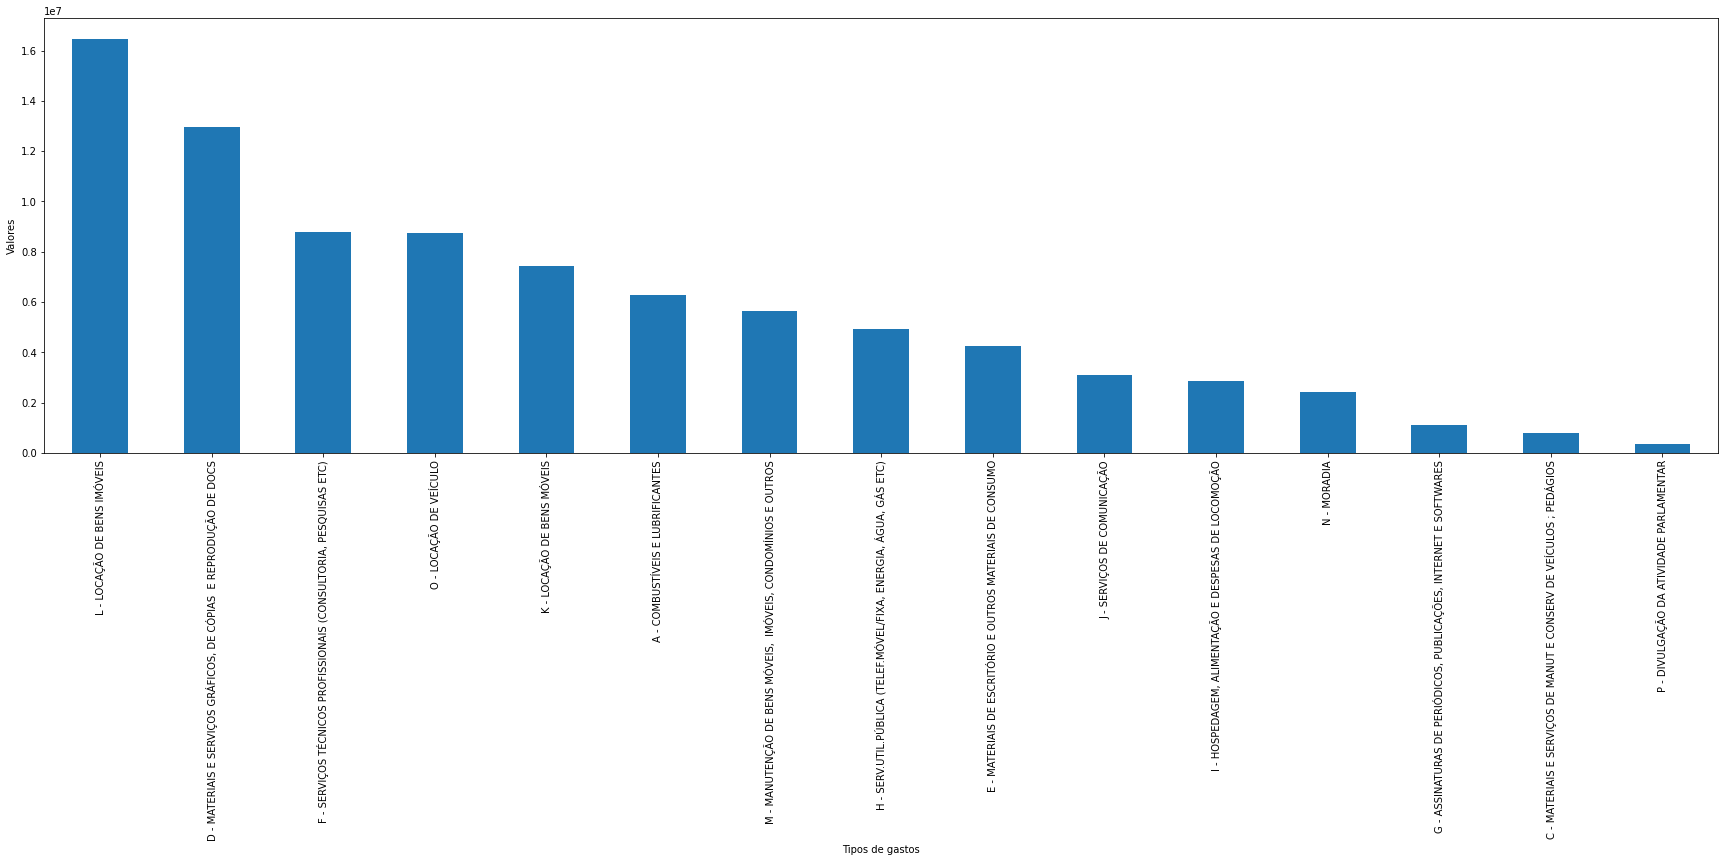

In [ ]:
#Gasto com os tipos de gastos com plot
df_ano.groupby(['Tipo']).Valor.sum().sort_values(ascending=False).plot.bar(x='Tipo',y='Valor',figsize=(30,8),xlabel="Tipos de gastos",ylabel="Valores") 

# Preparo para formato CSV e conexão com Google Cloud

In [ ]:
df_01

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
524627,2007,300441,3,120.00,06306675000140,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
524628,2007,300441,3,2096.80,52204617000122,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
524629,2007,300441,3,13.48,62925474000282,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
524630,2007,300441,3,38.08,66747577000170,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


In [ ]:
df_02

,IdDeputado,IdSPL,IdUA,Situacao,Matricula,NomeParlamentar,Sala,Partido
0,549,1000000330,20377,EXE,300605,Adalberto Freitas,305,PSDB
1,548,1000000332,20370,EXE,300606,Adriana Borgo,T. 45,PTC
2,547,1000000335,20455,EXE,300607,Agente Federal Danilo Balas,255,PL
3,128,39,20369,EXE,300288,Aldo Demarchi,356,UNIÃO
4,546,1000000342,20399,EXE,300608,Alex de Madureira,173,PL
5,261,13076,20413,EXE,300553,Alexandre Pereira,405,SD
6,545,1000000351,20420,EXE,300609,Altair Moraes,T. 53,REPUBLICANOS
7,6,434,20378,EXE,300431,Analice Fernandes,261,PSDB
8,58,12381,20433,EXE,300497,André do Prado,350,PL
9,542,1000000363,20436,EXE,300612,Ataide Teruel,T-39,PODE


In [ ]:
df_novo = pd.merge(df_01, df_02)

In [ ]:
df_novo.to_csv('ativ_tratada.csv')

In [ ]:
from google.cloud import storage
# Setting credentials using the downloaded JSON file
client = storage.Client.from_service_account_json(json_credentials_path='.json')
#Indicando a bucket que vai ser usada
bucket = client.get_bucket('bucket')
#Montando o nome do arquivo
object_name_in_gcs_bucket = bucket.blob('ativ.csv')
#Fazendo o upload para o bucket
object_name_in_gcs_bucket.upload_from_filename('ativ.csv')